# Credit Card Fraud – EDA (Local)
**Data:** `ml-model/data/creditcard.csv`
Class distribution, Amount (log) histogram, Time-of-day histogram, and split strategies.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 50)

os.chdir("/home/k1rel/programming/DIPLOMSKA/rt-fraud-pipeline")
csv = Path("ml-model/data/creditcard.csv")
assert csv.exists(), f"Missing {csv}"

In [3]:
df = pd.read_csv(csv)
df.shape, df.columns.tolist()

((284807, 31),
 ['Time',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'Amount',
  'Class'])

## Class Distribution

{'total': 284807, 'fraud': 492, 'normal': 284315, 'fraud_ratio_%': 0.1727485630620034}


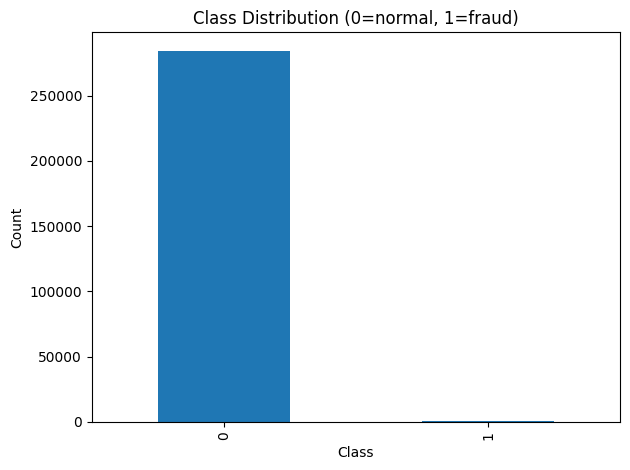

In [7]:
counts = df['Class'].value_counts().sort_index()
total = len(df)
fraud = int(df['Class'].sum())
ratio = 100.0 * fraud / total
print({'total': total, 'fraud': fraud, 'normal': total - fraud, 'fraud_ratio_%': ratio})
counts.plot(kind='bar', title='Class Distribution (0=normal, 1=fraud)')
plt.xlabel('Class'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

## Amount Histogram (log1p)

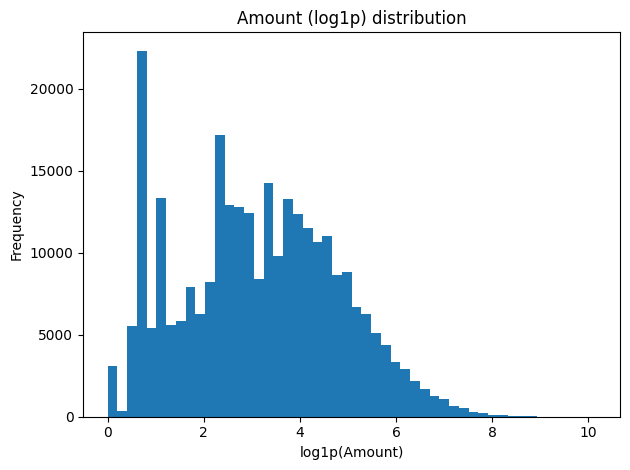

In [8]:
plt.figure()
plt.hist(np.log1p(df['Amount'].values), bins=50)
plt.title('Amount (log1p) distribution')
plt.xlabel('log1p(Amount)'); plt.ylabel('Frequency'); plt.tight_layout(); plt.show()

## Time-of-day Histogram

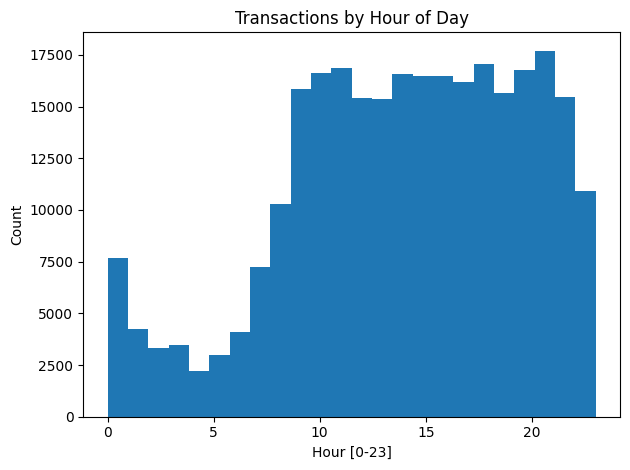

In [9]:
hours = (df['Time'] % (24*3600)) // 3600
plt.figure()
plt.hist(hours, bins=24)
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour [0-23]'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

## Split Strategies

In [4]:
# Time-based 80/20
df_sorted = df.sort_values('Time').reset_index(drop=True)
cut = int(0.8 * len(df_sorted))
train_time = df_sorted.iloc[:cut].copy()
test_time  = df_sorted.iloc[cut:].copy()
print({'train_time': len(train_time), 'test_time': len(test_time),
       'fraud_train': int(train_time['Class'].sum()), 'fraud_test': int(test_time['Class'].sum())})

# Stratified 80/20
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print({'train_strat': len(X_train), 'test_strat': len(X_test),
       'fraud_train_strat': int(y_train.sum()), 'fraud_test_strat': int(y_test.sum())})

{'train_time': 227845, 'test_time': 56962, 'fraud_train': 417, 'fraud_test': 75}
{'train_strat': 227845, 'test_strat': 56962, 'fraud_train_strat': 394, 'fraud_test_strat': 98}


In [4]:
min_t = df['Time'].min()
max_t = df['Time'].max()
duration_sec = max_t - min_t
duration_hr  = duration_sec / 3600
duration_days = duration_hr / 24
min_t, max_t, duration_sec, duration_hr, duration_days


(np.float64(0.0),
 np.float64(172792.0),
 np.float64(172792.0),
 np.float64(47.99777777777778),
 np.float64(1.9999074074074075))

## Notes
- Severe imbalance (~0.172% fraud). Consider class weighting or anomaly detection.
- Prefer time-based evaluation to avoid leakage.
- `Amount` may benefit from scaling.